In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import itertools
import warnings
warnings.simplefilter("ignore")

# DO NOT CALL Numbers

## The following data is from FTC.gov:

https://www.ftc.gov/site-information/open-government/data-sets/do-not-call-data

Here we look at some common area codes that affect different states.

In [2]:
# Do Not Call numbers complaint reports taken from 9/20/21 - 10/6/21  (~ 18 MB)
df = pd.read_csv('dnc_complaint_numbers_2021-10-06.csv');df
df2 = pd.read_csv('dnc_complaint_numbers_2021-10-05.csv');df2 
df3 = pd.read_csv('dnc_complaint_numbers_2021-10-04.csv');df3
df4 = pd.read_csv('dnc_complaint_numbers_2021-10-01.csv');df4
df5 = pd.read_csv('dnc_complaint_numbers_2021-09-27.csv');df4
df6 = pd.read_csv('dnc_complaint_numbers_2021-09-28.csv');df4
df7 = pd.read_csv('dnc_complaint_numbers_2021-09-24.csv');df4
df8 = pd.read_csv('dnc_complaint_numbers_2021-09-23.csv');df4
df9 = pd.read_csv('dnc_complaint_numbers_2021-09-22.csv');df4
df10 = pd.read_csv('dnc_complaint_numbers_2021-09-21.csv');df4
df11 = pd.read_csv('dnc_complaint_numbers_2021-09-20.csv');df4

# All Concatenated Togeter
df_oct_wk = pd.concat([df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
df_oct_wk

,Company_Phone_Number,Created_Date,Violation_Date,Consumer_City,Consumer_State,Consumer_Area_Code,Subject,Recorded_Message_Or_Robocall
0,9792340943,2021-10-05 00:02:39,2021-09-28 17:13:00,NaN,Texas,832.0,No Subject Provided,NaN
1,2692086616,2021-10-05 00:02:42,2021-10-04 11:10:00,COLLEGE PLACE,Washington,269.0,Other,N
2,6787121203,2021-10-05 00:02:54,2021-10-04 15:45:00,Lilburn,Georgia,770.0,Other,Y
3,8328384664,2021-10-05 00:04:06,2021-09-28 10:35:00,NaN,Texas,832.0,No Subject Provided,NaN
4,2108951655,2021-10-05 00:03:43,2021-10-04 00:00:00,NaN,Texas,210.0,No Subject Provided,Y
...,...,...,...,...,...,...,...,...
20519,3309935416,2021-09-19 23:58:31,2021-09-16 11:00:00,NaN,Ohio,330.0,Dropped call or no message,Y
20520,8444411495,2021-09-19 23:59:33,2021-09-16 12:00:00,NaN,Ohio,330.0,Dropped call or no message,Y
20521,8662582105,2021-09-19 11:27:55,2021-09-17 11:27:04,NaN,Ohio,614.0,Other,NaN
20522,5055952181,2021-09-19 15:08:27,2021-09-16 16:20:00,ELYRIA,Ohio,440.0,Other,N


### Some Data Cleaning: Very messy data due to human reporting error

In [3]:
for i in range(2):
    # for some reason running the codex once does not get rid of empty string row, but running it twice does:
    df_oct_wk = df_oct_wk[df_oct_wk["Company_Phone_Number"]!='']
    
    # cleaning data, getting rid of nan, alphabetical entries, special characters, bytestrings
    df_oct_wk = df_oct_wk.dropna()
    print(df_oct_wk["Company_Phone_Number"])
    df_oct_wk = df_oct_wk[~df_oct_wk["Company_Phone_Number"].str.isalpha()]
    alphabets=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',\
              'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    for c in alphabets:
        df_oct_wk = df_oct_wk[~df_oct_wk["Company_Phone_Number"].str.contains(c)]
    print(df_oct_wk["Company_Phone_Number"])
    replacement_dict = {'–':'','a':'','b':'','c':'','d':'','e':'','f':'','g':'', \
                                                  'h':'','i':'','k':'','l':'','m':'','n':'','o':'','p':'','q':'','r':'', \
                                                  's':'','t':'','u':'','v':'','w':'','x':'','y':'','z':'','!':'', \
                                                  '@':'','#':'','$':'','%':'','^':'','&':'','*':'','(':'',')':'','?':'',\
                       'A':'','B':'','C':'','D':'','E':'','X':'','Y':'','Z':'','F':'','\xa0':'','=':'',';':'','`':'','´':''}
    for i, (k, v) in enumerate(replacement_dict.items()):
        df_oct_wk["Company_Phone_Number"]=df_oct_wk["Company_Phone_Number"].str.replace(k,v,regex=False)
    

# make area code column
df_oct_wk["Scam AreaCode"] = round(df_oct_wk["Company_Phone_Number"].astype(float)/10**7,3)
df_oct_wk["Scam AreaCode"] = df_oct_wk["Scam AreaCode"].astype(int)

1        2692086616
2        6787121203
8        2694764832
9        6099314008
12       6098215854
            ...    
20510    6083716666
20511    8565748098
20512    8003749700
20515    4156619737
20522    5055952181
Name: Company_Phone_Number, Length: 85829, dtype: object
1        2692086616
2        6787121203
8        2694764832
9        6099314008
12       6098215854
            ...    
20510    6083716666
20511    8565748098
20512    8003749700
20515    4156619737
20522    5055952181
Name: Company_Phone_Number, Length: 85692, dtype: object
1        2692086616
2        6787121203
8        2694764832
9        6099314008
12       6098215854
            ...    
20510    6083716666
20511    8565748098
20512    8003749700
20515    4156619737
20522    5055952181
Name: Company_Phone_Number, Length: 85691, dtype: object
1        2692086616
2        6787121203
8        2694764832
9        6099314008
12       6098215854
            ...    
20510    6083716666
20511    8565748098
20512    

# What time do sp(c)ammers call most often?

## Is there different time profile depending on the area code?

We want to see if usually when do sp(c)ammers call most often. We saw from Part I that they call the most on Friday. We want to get a time profile (number of calls vs hour of the day) for Friday. We also want to see if the mode of the spamming area code follows a different time schedule since they are usually from a different state. 

The most commonly spammed hour on Friday is  12 PM


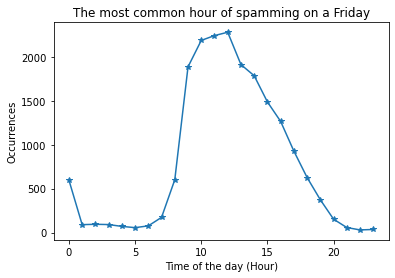

In [4]:
times_of_scam = pd.to_datetime(df_oct_wk["Violation_Date"])
df_oct_wk["Weekday"] = times_of_scam.dt.day_name()
# df_oct_wk[["Weekday","Violation_Date"]]
# friday_scams = pd.to_datetime(df_oct_wk[df_oct_wk["Weekday"]=="Friday"])
friday_scams = df_oct_wk[df_oct_wk["Weekday"]=="Friday"]
friday_scamtimes = pd.to_datetime(friday_scams["Violation_Date"])
friday_scamhr = friday_scamtimes.dt.hour
friday_scamhr_cts = friday_scamhr.value_counts().rename_axis('Hours').reset_index(name='counts');
friday_scamhr_cts = friday_scamhr_cts.sort_values(by="Hours")
plt.plot(friday_scamhr_cts["Hours"],friday_scamhr_cts["counts"],"*-")
plt.xlabel("Time of the day (Hour)")
plt.ylabel("Occurrences")
plt.title("The most common hour of spamming on a Friday")
print("The most commonly spammed hour on Friday is ", int(friday_scamhr.mode()), 'PM')

Now we want to look at what time area code 707 (mode for spamming GA) calls the most often and see if there is any difference from the general violation times.

The most commonly spammed hour by area code 707 is  11 AM, compared to  12 PM for Fridays
The most commonly spammed day by area code 707 is also      Friday
dtype: object


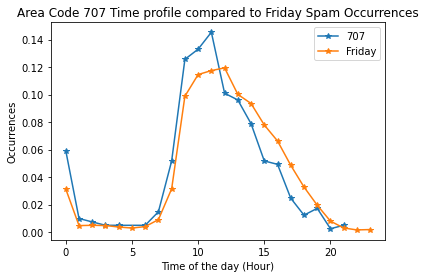

In [5]:
scams_707 = df_oct_wk[df_oct_wk["Scam AreaCode"]==707]
scams_707hr = pd.to_datetime(scams_707["Violation_Date"]).dt.hour
scams_707hr_cts = scams_707hr.value_counts().rename_axis("Hours").reset_index(name='counts').sort_values(by="Hours")
plt.figure(1)
plt.plot(scams_707hr_cts["Hours"],scams_707hr_cts["counts"]/sum(scams_707hr_cts["counts"]),'*-',label="707")
plt.plot(friday_scamhr_cts["Hours"],friday_scamhr_cts["counts"]/sum(friday_scamhr_cts['counts']),"*-",label="Friday")
plt.xlabel("Time of the day (Hour)")
plt.ylabel("Occurrences")
plt.title("Area Code 707 Time profile compared to Friday Spam Occurrences")
plt.legend()
print("The most commonly spammed hour by area code 707 is ", int(scams_707hr.mode()), 'AM, compared to ', int(friday_scamhr.mode()), 'PM for Fridays')
print("The most commonly spammed day by area code 707 is also ",str(scams_707["Weekday"].mode())[1:])

